In [1]:
from datetime import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import regress_with_conf_interval as re

In [2]:
filename = r'./data/difficulty_0/elapseTime.csv' 
df = pd.read_csv(filename)
type(df)

pandas.core.frame.DataFrame

In [3]:
df_list = []
for i in range(11):
    file_name = f'./data/difficulty_{i}/elapseTime.csv' 
    df = pd.read_csv(file_name)
    df_list.append(df)

In [4]:
for i in range(11):
    for idx, elapsed_time in enumerate(df_list[i].elapsed_time):
        #print("Elasped time : ", elapsed_time)
        if elapsed_time.find('h') != -1:
            hour, elapsed_time = elapsed_time.split('h')
        else:
            hour = 0.0

        if elapsed_time.find('m') != -1 and elapsed_time.find('ms') == -1:
            minute, elapsed_time = elapsed_time.split('m')
        else:
            minute = 0.0

        if elapsed_time.find('s') != -1 and elapsed_time.find('ms') == -1:
            second, elapsed_time = elapsed_time.split('s')
        else:   
            second = 0.0

        if elapsed_time.find('ms') != -1:
            ms, elapsed_time = elapsed_time.split('ms')
        else:
            ms = 0.0
        
        # print("hour : ", float(hour))
        # print("minute : ", float(minute))
        # print("second : ", float(second))
        # print("ms : ", float(ms))

        df_list[i].elapsed_time[idx] = str(float(hour) * 3600 + float(minute) * 60 + float(second) + float(ms) / 100)

In [5]:
x = df_list[2]['block_height']
y = df_list[2]['elapsed_time']

frame = pd.Series(y, index=list(x - 1))
frame

0       3.198790685
1       7.760257639
2       90.33948517
3      11.803536997
4        3.05967527
           ...     
618    30.830607594
619     7.084242085
620    25.924623914
621     10.77107304
622     2.642203368
Name: elapsed_time, Length: 623, dtype: object

In [6]:
arr = df_list[0]['elapsed_time'].astype(float)
arr.mean()

13.432710384965796

In [7]:
mean_list = []
for i in range(11):
    arr = df_list[i]['elapsed_time'].astype(float)    
    print(f"Difficulty {i} mean:{arr.mean()}, var : {arr.var()}, std : {arr.std()} \n")
    mean_list.append(arr.mean())

Difficulty 0 mean:13.432710384965796, var : 165.0307023016503, std : 12.846427608547456 

Difficulty 1 mean:14.395139179861385, var : 199.10121769164354, std : 14.110323089555516 

Difficulty 2 mean:21.273333525475124, var : 396.7894283367212, std : 19.91957399988065 

Difficulty 3 mean:41.43564656466107, var : 1655.6750762860745, std : 40.68998742056914 

Difficulty 4 mean:58.94236432162644, var : 3377.928883313135, std : 58.11995254052721 

Difficulty 5 mean:71.82114311676304, var : 4757.237481166286, std : 68.97272998197393 

Difficulty 6 mean:79.51829950663092, var : 6456.937932899812, std : 80.35507409554054 

Difficulty 7 mean:156.40696167265506, var : 30504.346295007243, std : 174.65493492886836 

Difficulty 8 mean:26139.7554881414, var : 710045388.8901935, std : 26646.67688268452 

Difficulty 9 mean:311.9340542150816, var : 123455.20647848008, std : 351.3619308896171 

Difficulty 10 mean:226.83626653029026, var : 52003.3456616723, std : 228.04242075033386 



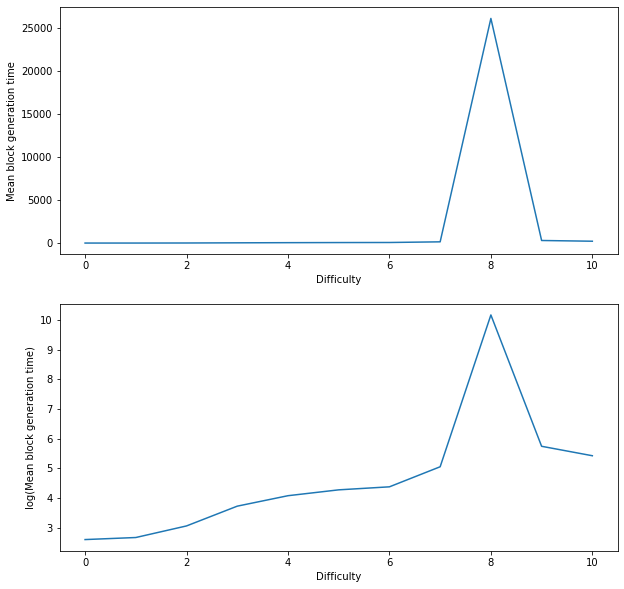

In [8]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1) 
ax1.plot(mean_list)
ax1.set_xlabel("Difficulty")
ax1.set_ylabel("Mean block generation time")


ax2 = fig.add_subplot(2,1,2) 
ax2.plot(np.log(mean_list))
ax2.set_xlabel("Difficulty")
ax2.set_ylabel("log(Mean block generation time)")

plt.show()

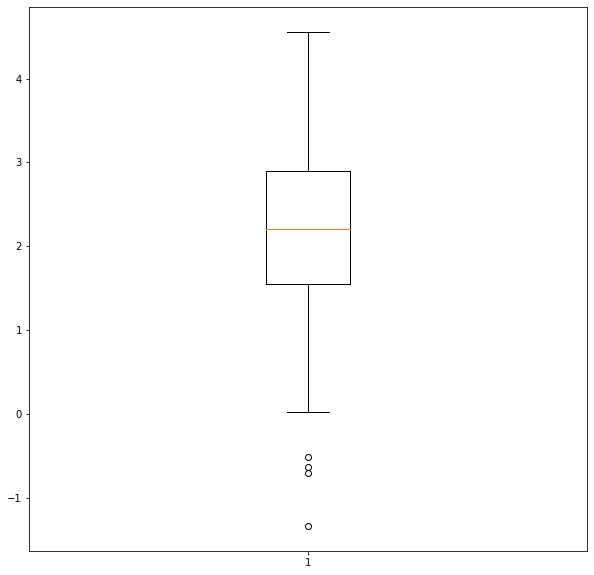

In [9]:
plt.boxplot(np.log(df_list[0]['elapsed_time'].astype(float)))
plt.show()

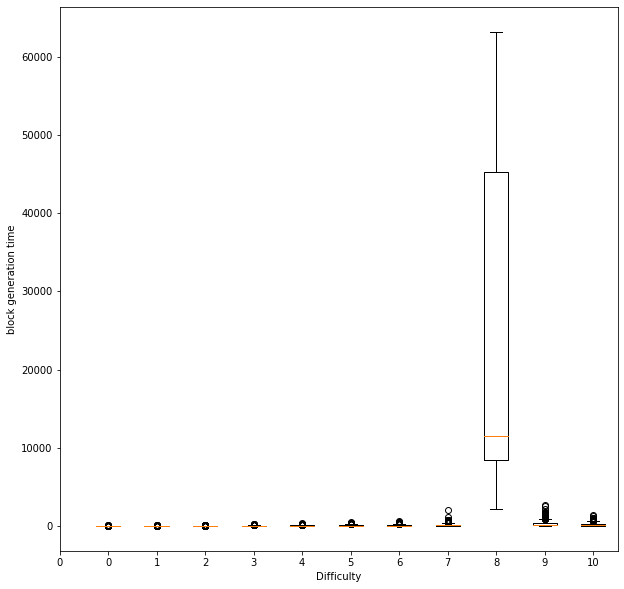

In [10]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots()
boxplot_list = []
tickers = []
for i in range(11):
    #boxplot_list.append(np.log(df_list[i]['elapsed_time'].astype(float)))
    boxplot_list.append((df_list[i]['elapsed_time'].astype(float)))
    tickers.append(i)

ax.boxplot(boxplot_list)
ax.set_xlabel("Difficulty")
ax.set_ylabel("block generation time")
plt.xticks(list(range(12)), [0] + list(range(11)))
plt.show()

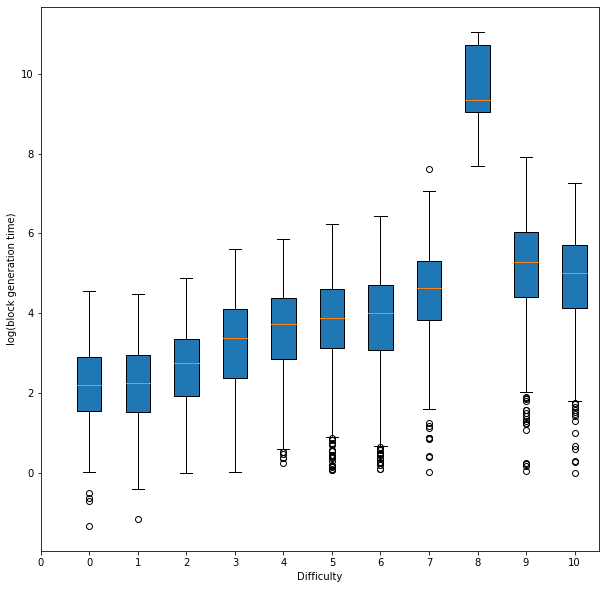

In [11]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots()
boxplot_list = []
tickers = []
for i in range(11):
    #boxplot_list.append(np.log(df_list[i]['elapsed_time'].astype(float)))
    boxplot_list.append(np.log(df_list[i]['elapsed_time'].astype(float)))
    tickers.append(i)

ax.boxplot(boxplot_list, patch_artist=True)
plt.xticks(list(range(12)), [0] + list(range(11)))
ax.set_xlabel("Difficulty")
ax.set_ylabel("log(block generation time)")
plt.show()

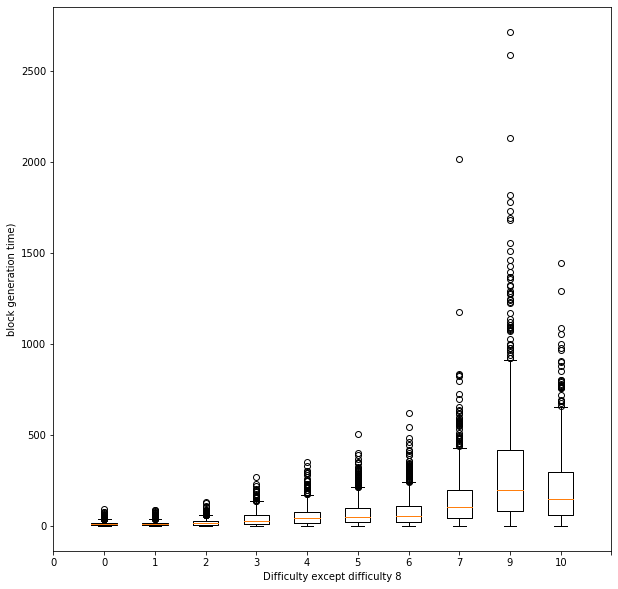

In [12]:
plt.rcParams["figure.figsize"] = (10,10)
fig, ax = plt.subplots()
boxplot_list = []
tickers = []
for i in range(11):
    if i == 8:
        continue
    #boxplot_list.append(np.log(df_list[i]['elapsed_time'].astype(float)))
    boxplot_list.append((df_list[i]['elapsed_time'].astype(float)))
    tickers.append(i)

ax.boxplot(boxplot_list)
ax.set_xlabel("Difficulty except difficulty 8")
ax.set_ylabel("block generation time)")
plt.xticks(list(range(12)), [0,0,1,2,3,4,5,6,7,9,10])
plt.show()

In [13]:
#import seaborn as sns
#ax = sns.boxplot(data=boxplot_list)
#ax = sns.swarmplot(data=boxplot_list)

In [14]:
#ax = sns.boxplot(data=boxplot_list)
#ax = sns.swarmplot(data=boxplot_list)

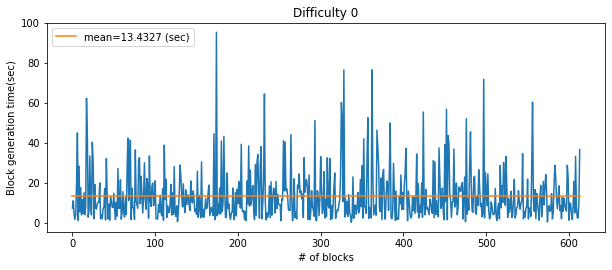

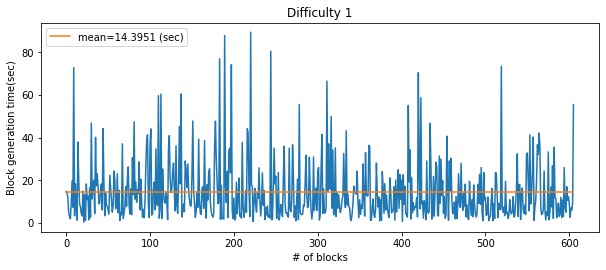

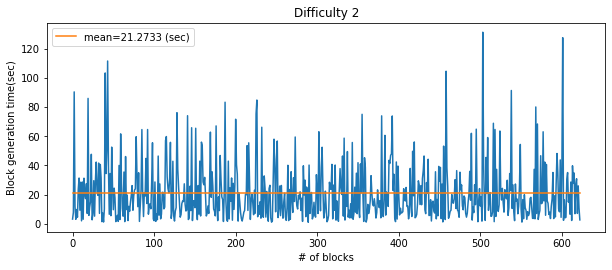

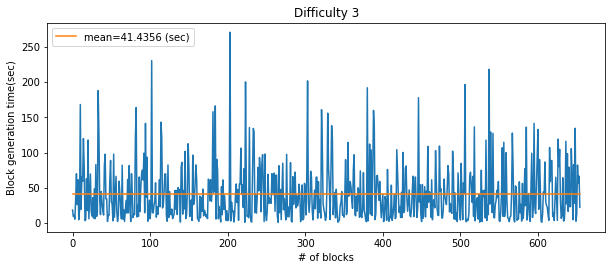

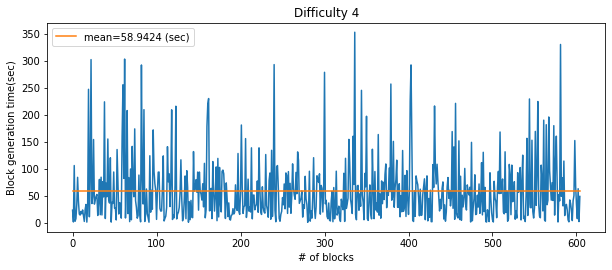

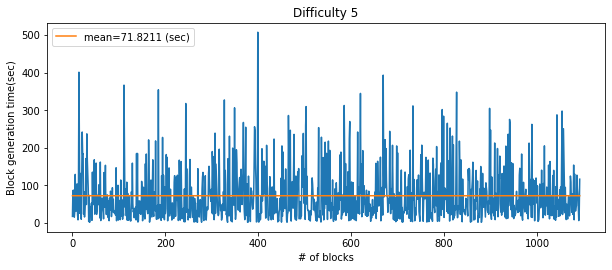

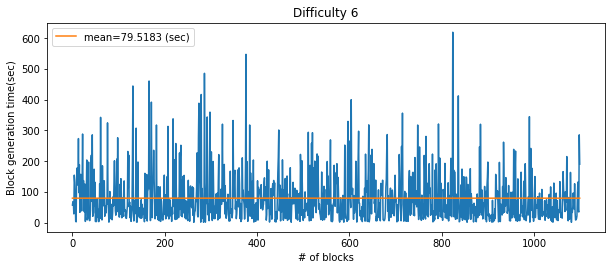

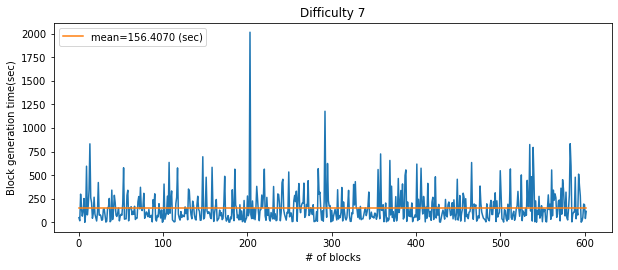

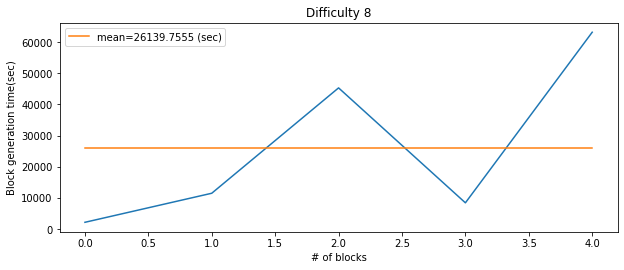

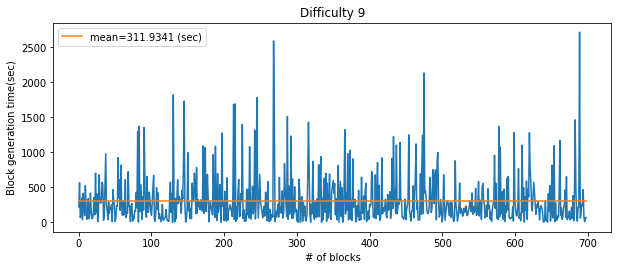

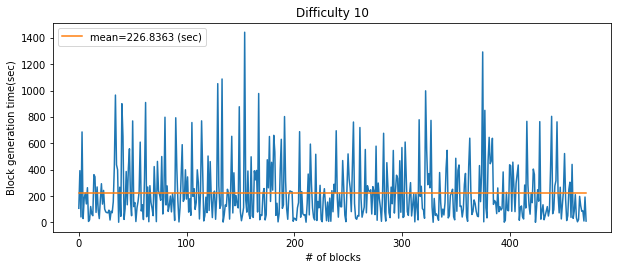

In [15]:
plt.rcParams["figure.figsize"] = (10,50)
for i in range(11):
    x = df_list[i]['block_height']
    frame = df_list[i]['elapsed_time'].astype(float)
    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)    
    mean = pd.Series(frame.mean(), index=list(x))
    ax.set_title(f"Difficulty {i}")
    ax.set_xlabel("# of blocks")
    ax.set_ylabel("Block generation time(sec)")
    ax.plot(frame)
    ax.plot(x-1, mean, label=f"mean={np.array(mean)[0]:.4f} (sec)")
    plt.legend(loc="upper left")


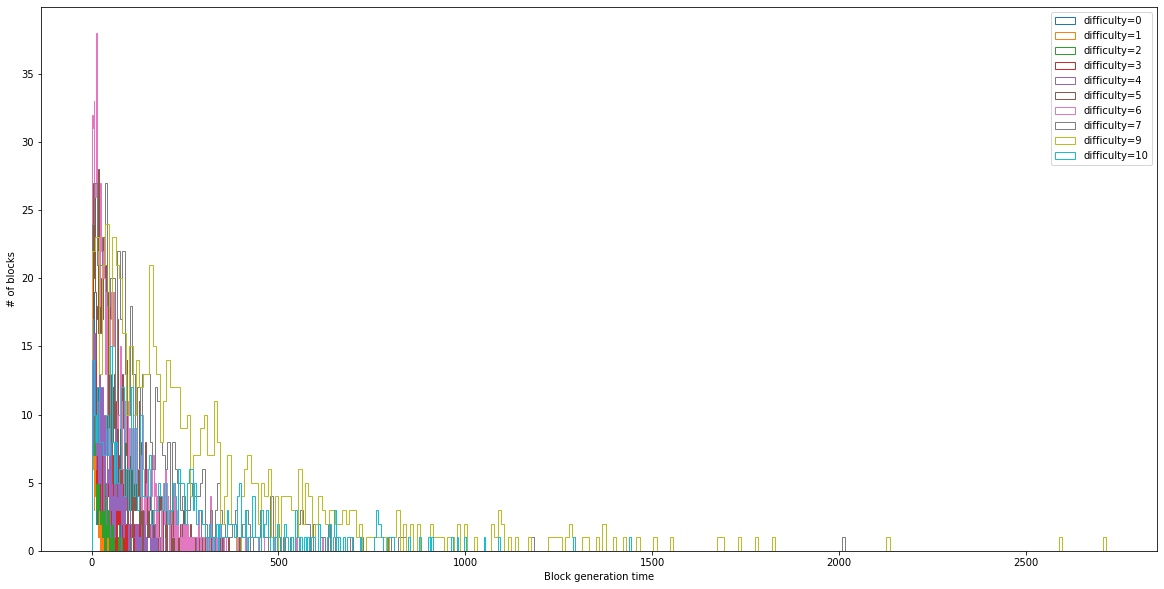

In [16]:
plt.rcParams["figure.figsize"] = (20,10)
num_of_bin = 300
x = df_list[i]['block_height']
fig = plt.figure()
ax = fig.add_subplot(1,1,1)    
for i in range(11):
    if i == 8:
        continue
    #ax.set_title(f"Difficulty {i}, bins = {num_of_bin}")
    ax.set_xlabel("Block generation time")
    ax.set_ylabel("# of blocks")
    frame = df_list[i]['elapsed_time'].astype(float)
    plt.hist(frame, bins=num_of_bin, label=f"difficulty={i}", histtype="step")    
    plt.legend(loc="upper right")


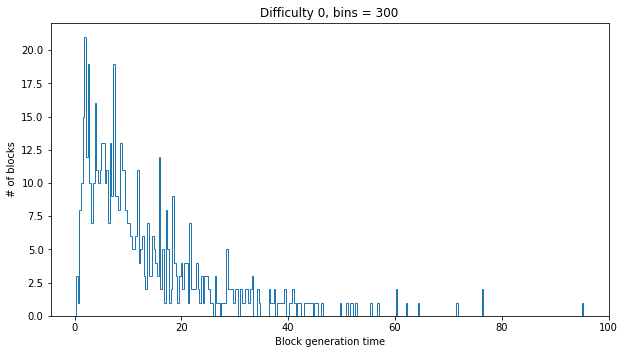

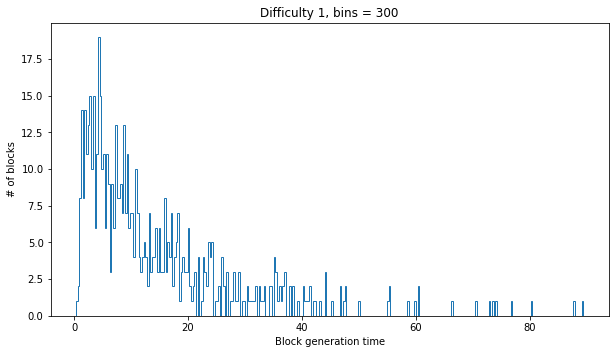

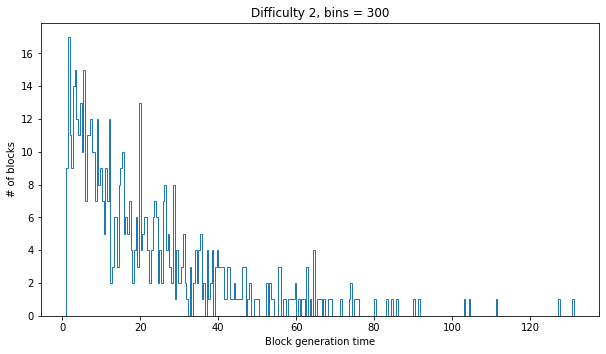

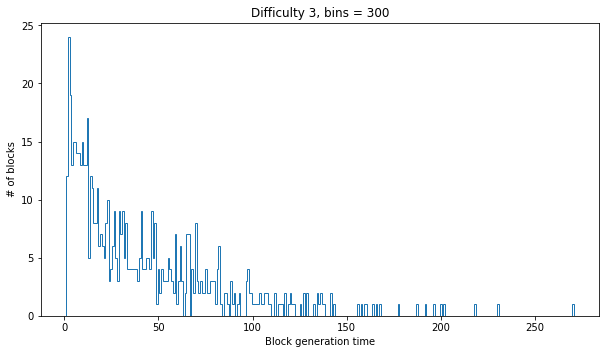

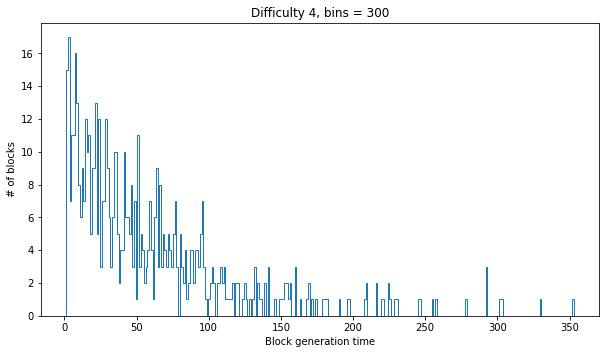

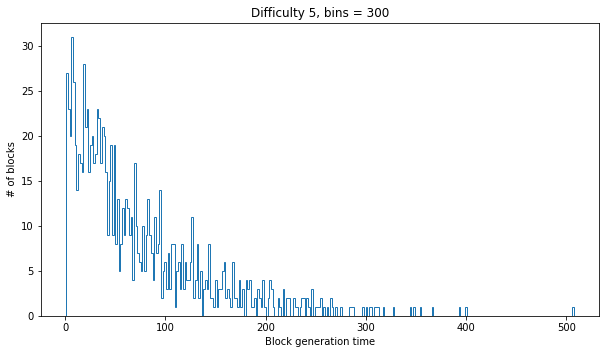

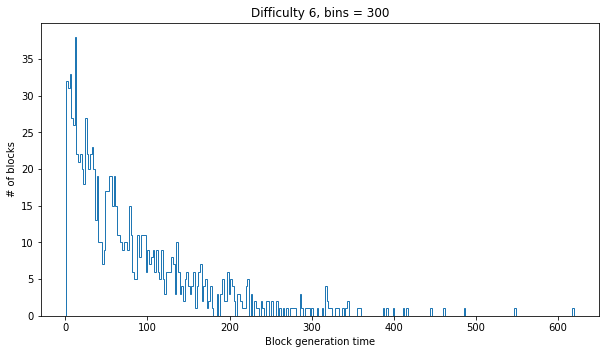

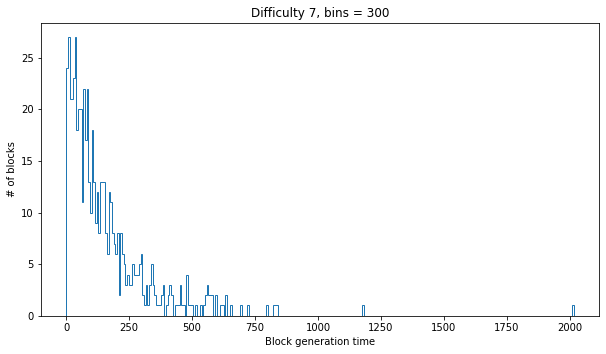

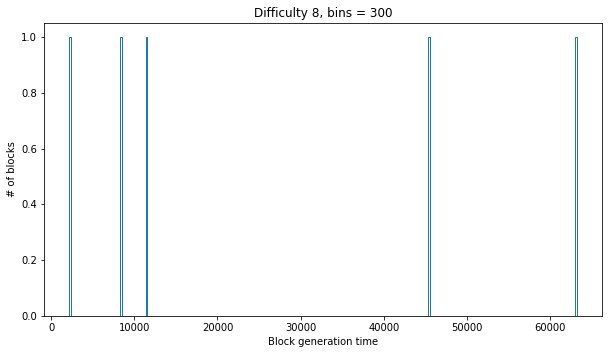

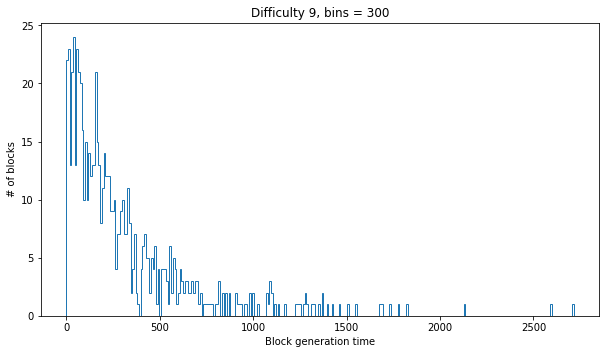

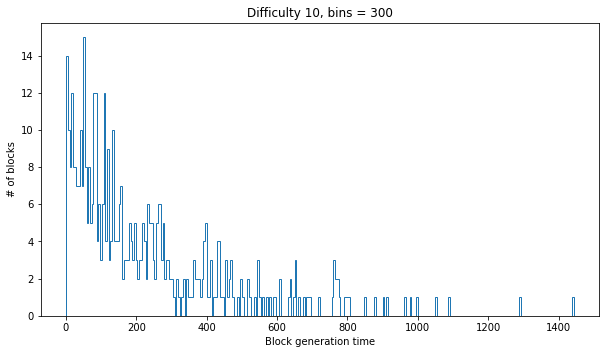

In [17]:
plt.rcParams["figure.figsize"] = (10,70)
num_of_bin = 300
val_list = []
bin_list = []
for i in range(11):
    x = df_list[i]['block_height']
    frame = df_list[i]['elapsed_time'].astype(float)
    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)    

    ax.set_title(f"Difficulty {i}, bins = {num_of_bin}")
    ax.set_xlabel("Block generation time")
    ax.set_ylabel("# of blocks")
    #plt.hist(frame, bins=num_of_bin, histtype='step')    
    val, bin, _ = plt.hist(frame, bins=num_of_bin, histtype='step')    
    val_list.append(val)
    bin_list.append(bin)
    #plt.legend(loc="upper left")


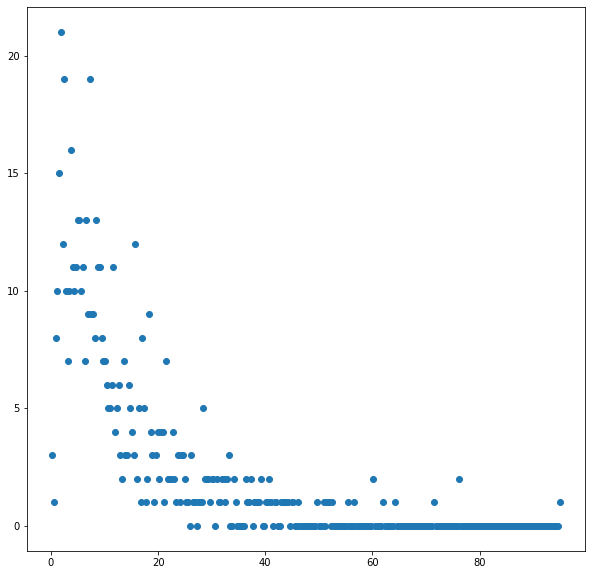

In [18]:
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(bin_list[0][:-1], val_list[0])

(0, 90)

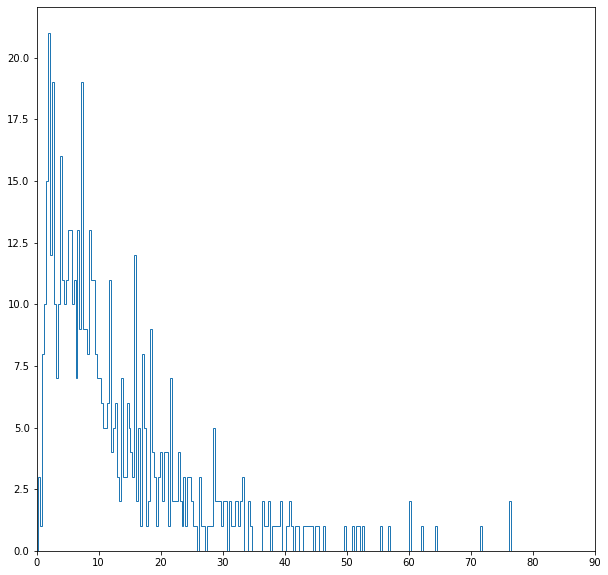

In [19]:
plt.rcParams["figure.figsize"] = (10,10)
frame = df_list[0]['elapsed_time'].astype(float)
n, bins, patches = plt.hist(frame, bins=num_of_bin, histtype='step')
plt.xlim([0,90])

In [20]:
print(val_list[0].shape)
print(bin_list[0].shape)

(300,)
(301,)


In [21]:
prob = list(val_list[0]/sum(val_list[0]))
for i in range(len(val_list[0])):
    print(i, val_list[0][i], f"{prob[i]:.4f}", bin_list[0][i])

0 3.0 0.0049 0.26221955999999996
1 1.0 0.0016 0.57887665778
2 8.0 0.0130 0.8955337555599998
3 10.0 0.0163 1.2121908533399999
4 15.0 0.0244 1.5288479511199997
5 21.0 0.0342 1.8455050488999996
6 12.0 0.0195 2.1621621466799996
7 19.0 0.0309 2.47881924446
8 10.0 0.0163 2.7954763422399997
9 7.0 0.0114 3.1121334400199996
10 10.0 0.0163 3.4287905377999994
11 16.0 0.0261 3.7454476355799997
12 11.0 0.0179 4.062104733359999
13 10.0 0.0163 4.378761831139999
14 11.0 0.0179 4.69541892892
15 13.0 0.0212 5.012076026699999
16 13.0 0.0212 5.328733124479999
17 10.0 0.0163 5.64539022226
18 11.0 0.0179 5.962047320039999
19 7.0 0.0114 6.278704417819999
20 13.0 0.0212 6.595361515599999
21 9.0 0.0147 6.912018613379999
22 19.0 0.0309 7.228675711159999
23 9.0 0.0147 7.545332808939999
24 9.0 0.0147 7.861989906719999
25 8.0 0.0130 8.178647004499998
26 13.0 0.0212 8.495304102279999
27 11.0 0.0179 8.811961200059999
28 11.0 0.0179 9.12861829784
29 8.0 0.0130 9.44527539562
30 7.0 0.0114 9.761932493399998
31 7.0 0.01

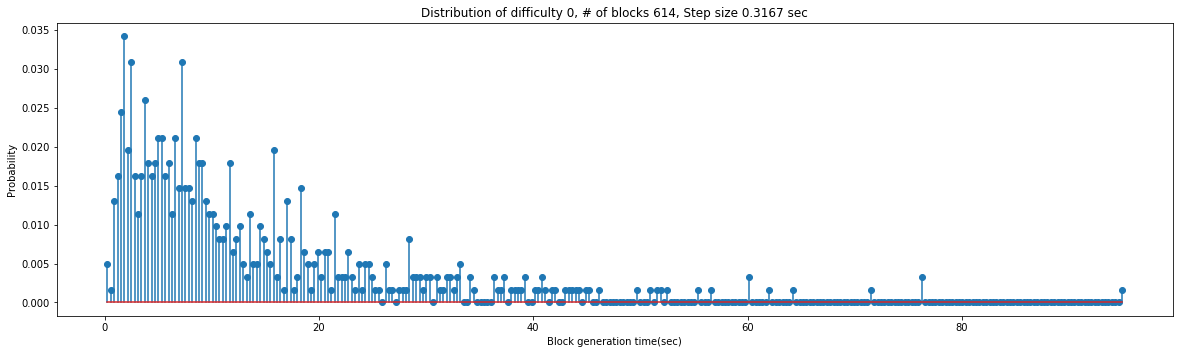

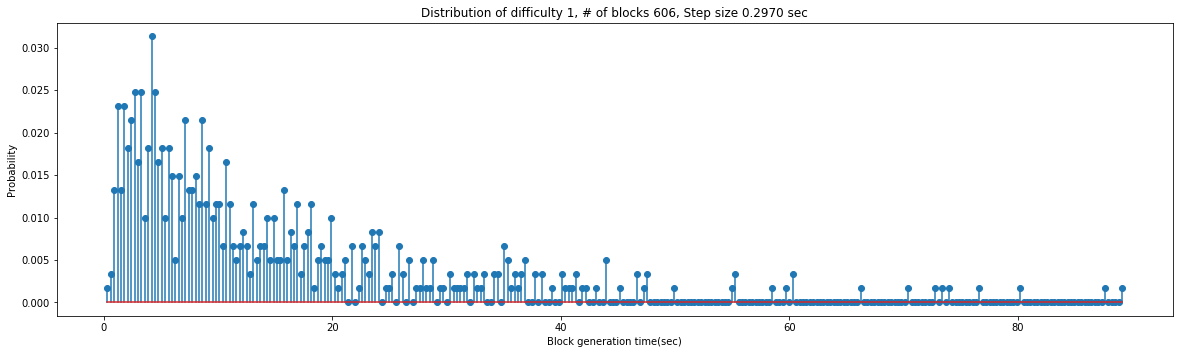

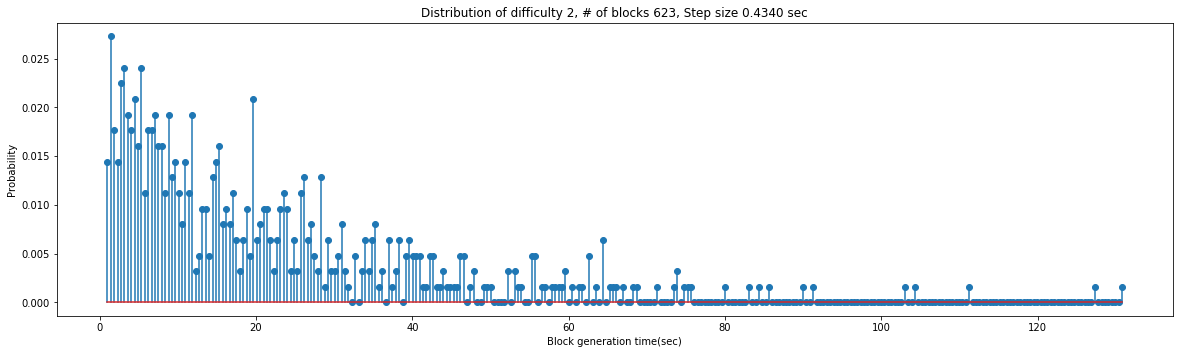

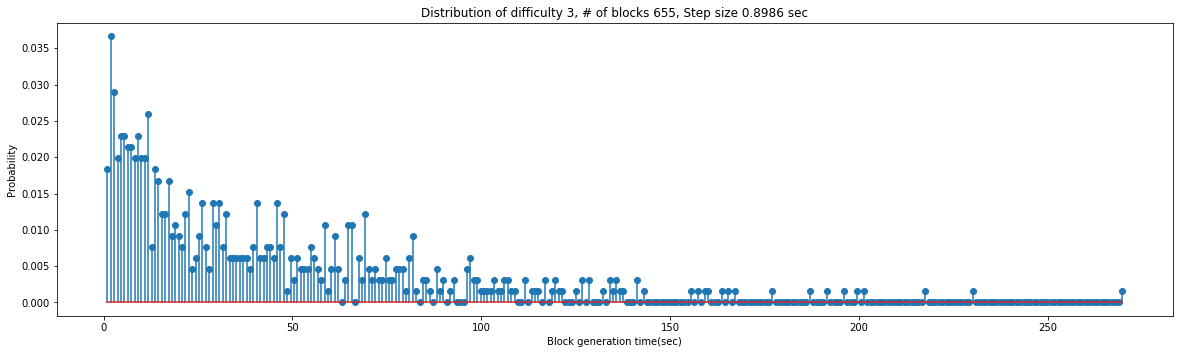

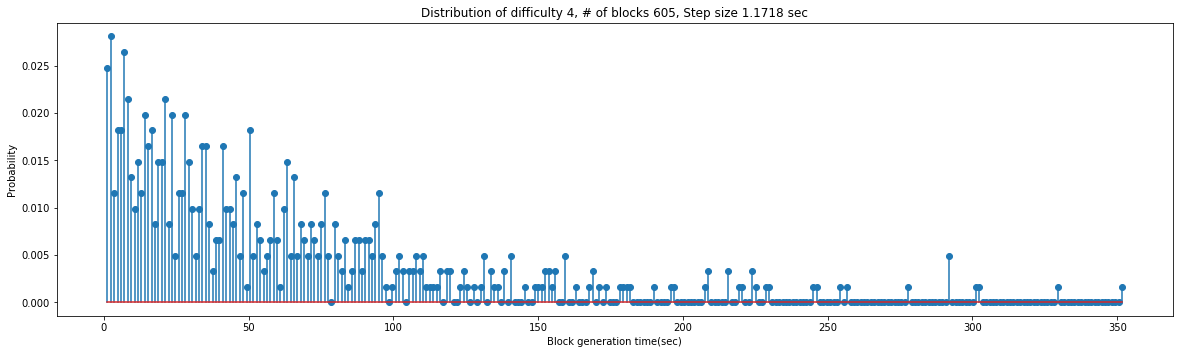

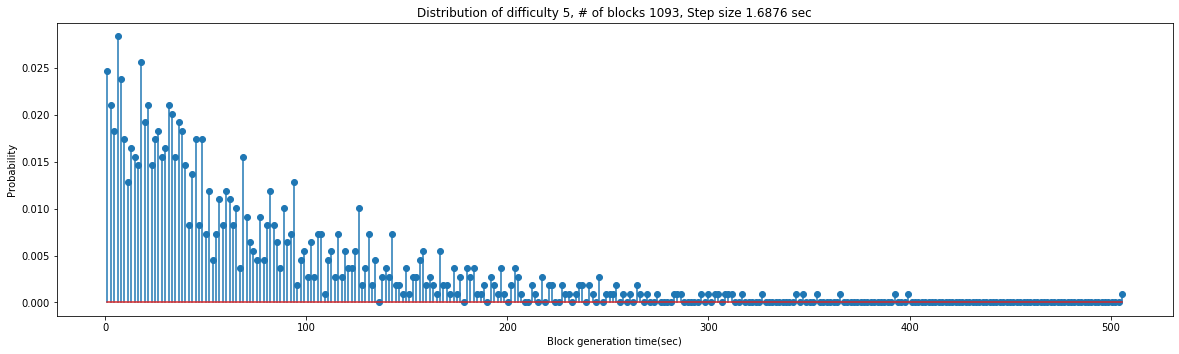

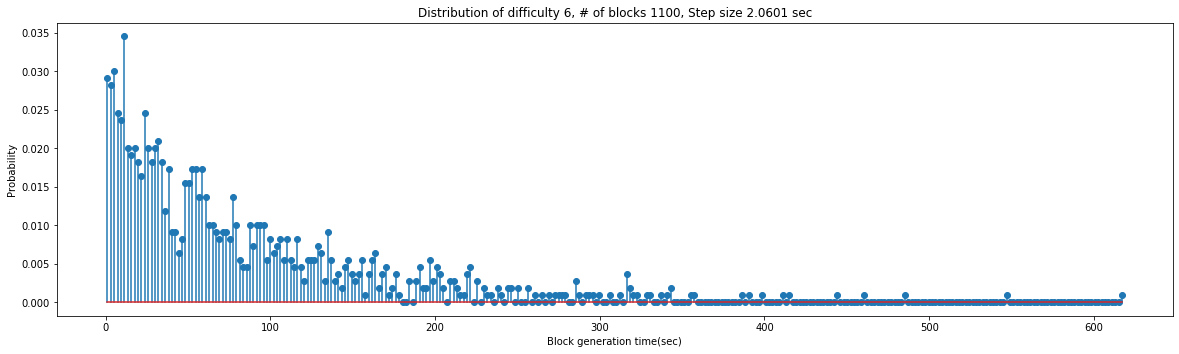

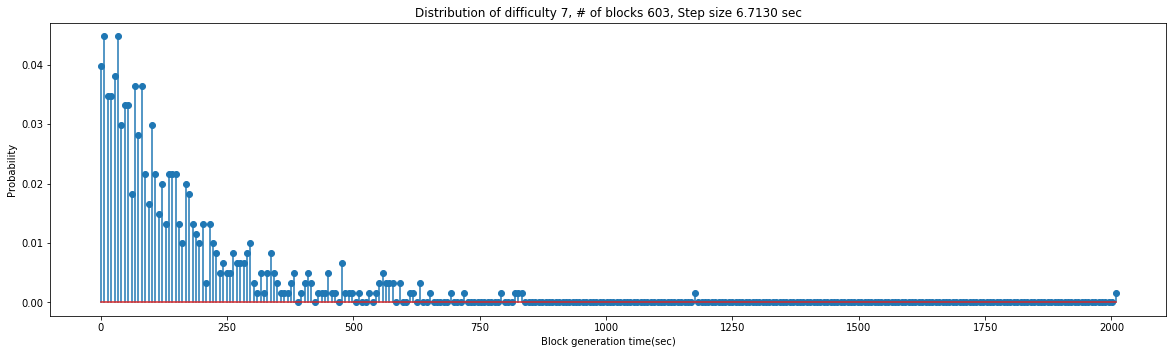

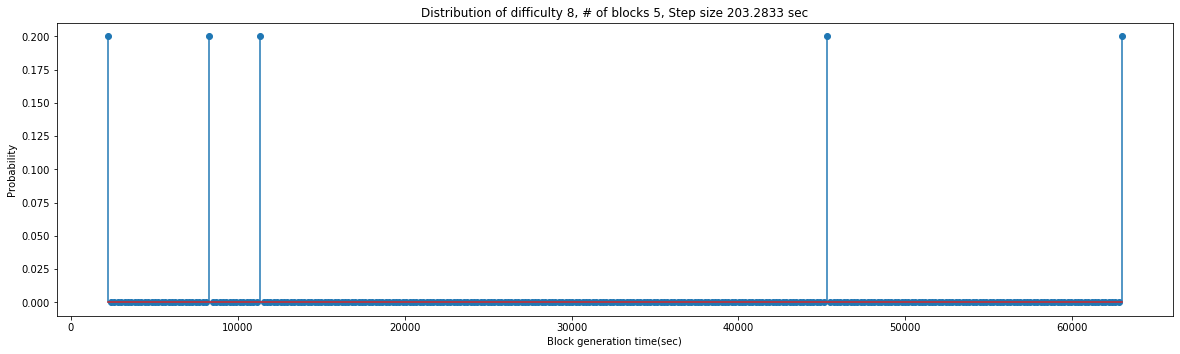

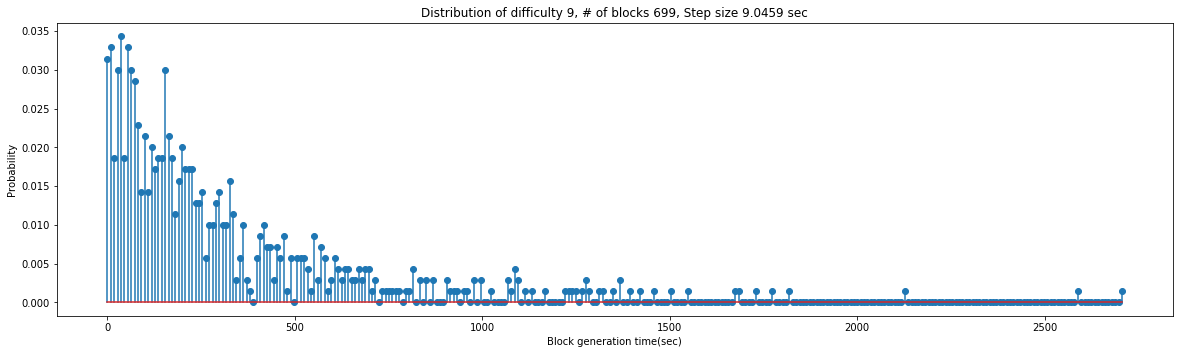

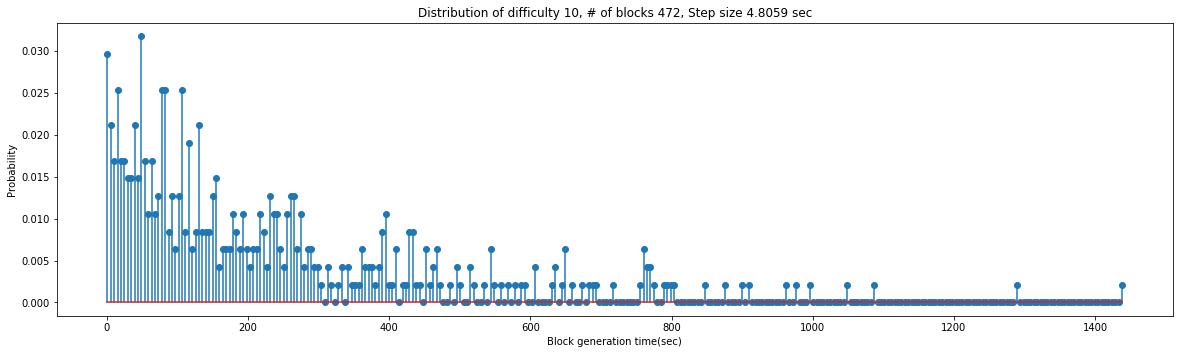

In [22]:
plt.rcParams["figure.figsize"] = (20,70)
num_of_bin = 100
for i in range(11):
    x = df_list[i]['block_height']
    frame = df_list[i]['elapsed_time'].astype(float)
    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)    

    ax.set_title(f"Distribution of difficulty {i}, # of blocks {len(np.array(frame))}, Step size {bin_list[i][1] - bin_list[i][0]:.4f} sec")
    #Each stick is {max(np.array(frame))/num_of_bin:.4f} sec
    ax.set_xlabel("Block generation time(sec)")
    ax.set_ylabel("Probability")
    #plt.hist(frame, bins=num_of_bin, histtype='step')    
    plt.stem(bin_list[i][:-1], val_list[i]/sum(val_list[i]))
    #plt.legend(loc="upper left")

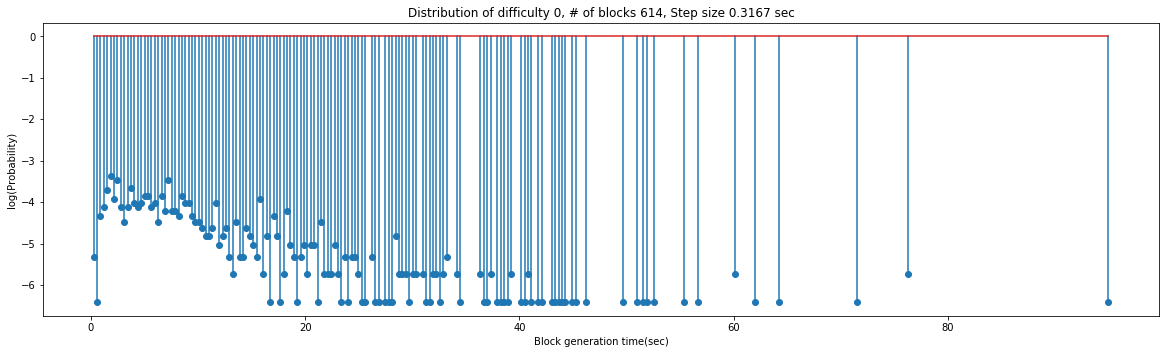

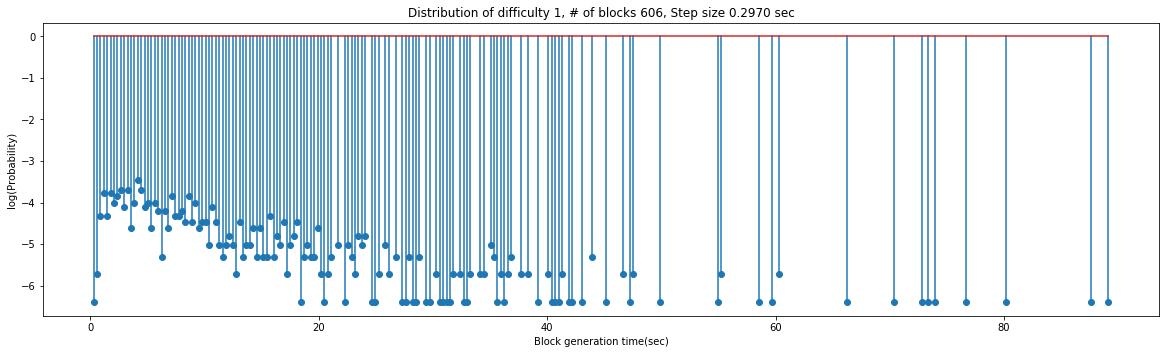

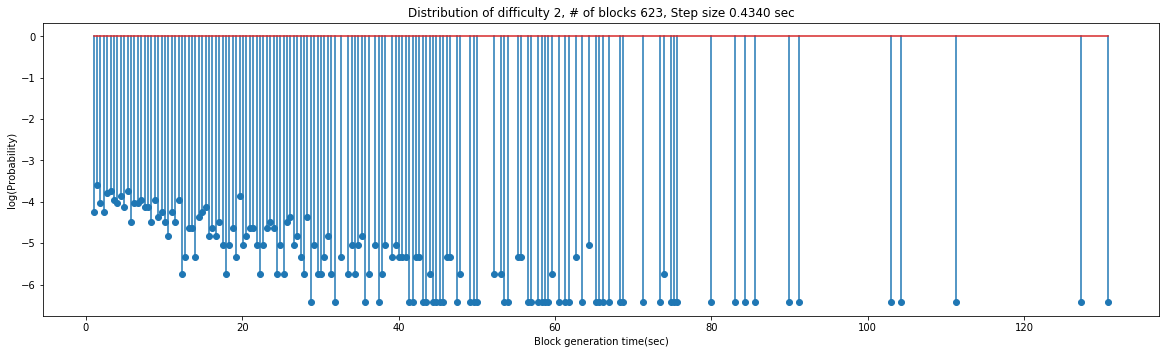

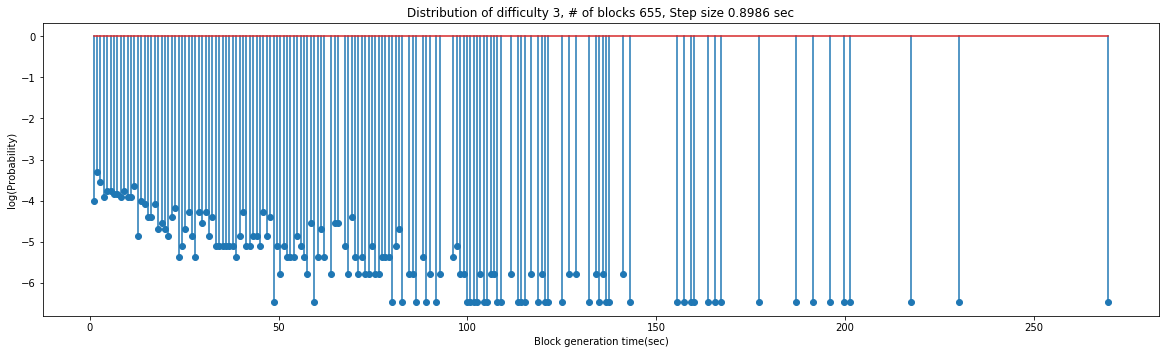

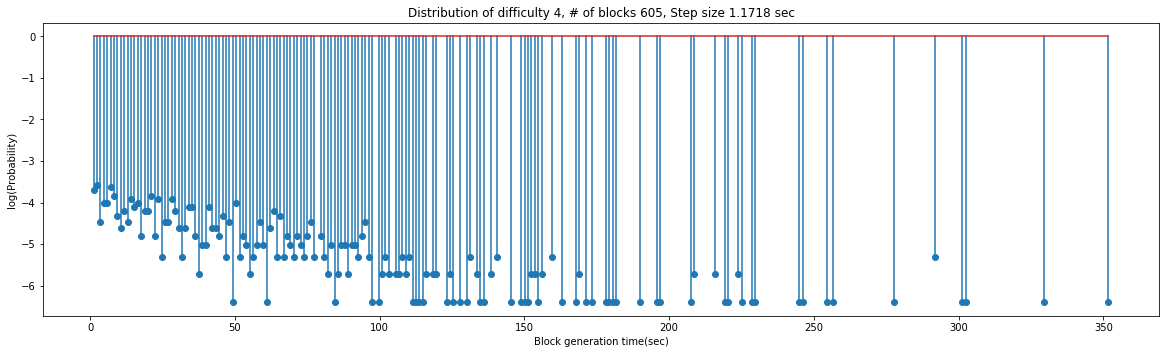

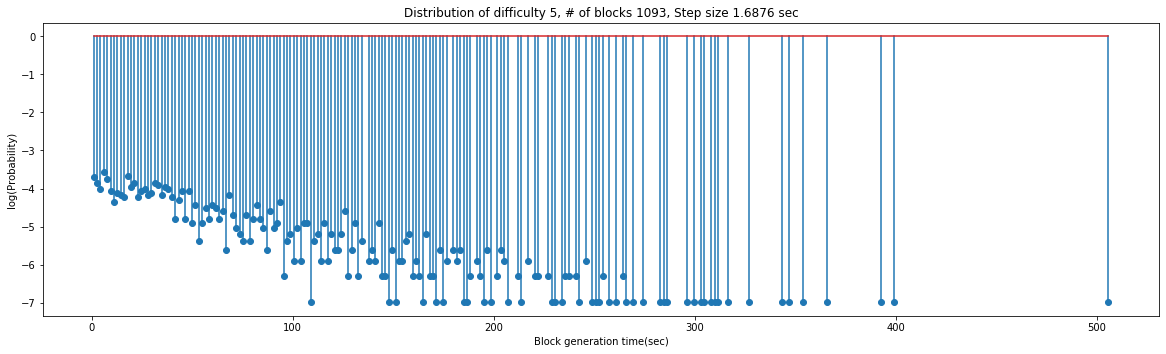

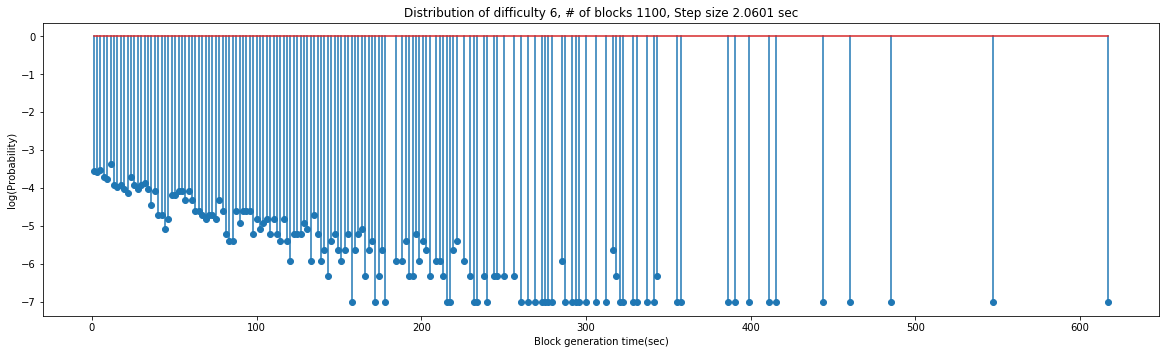

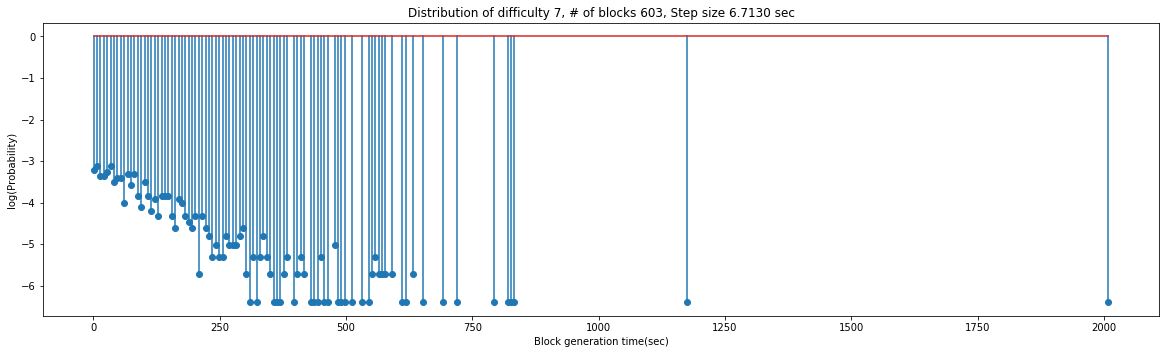

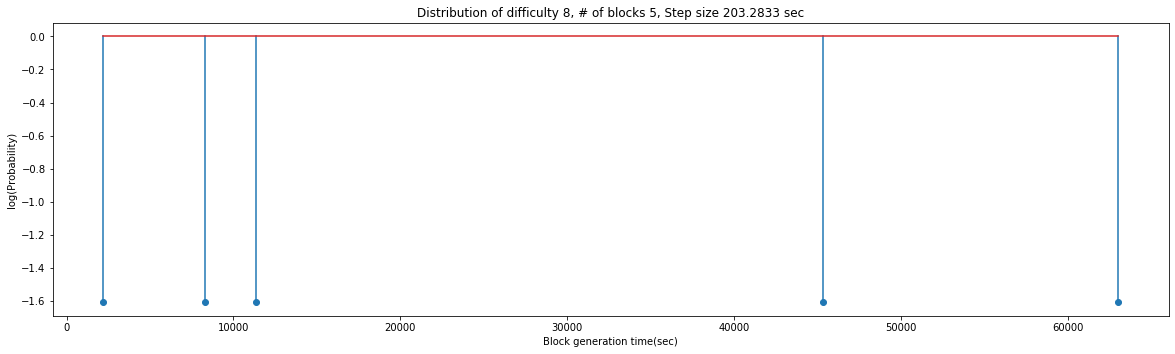

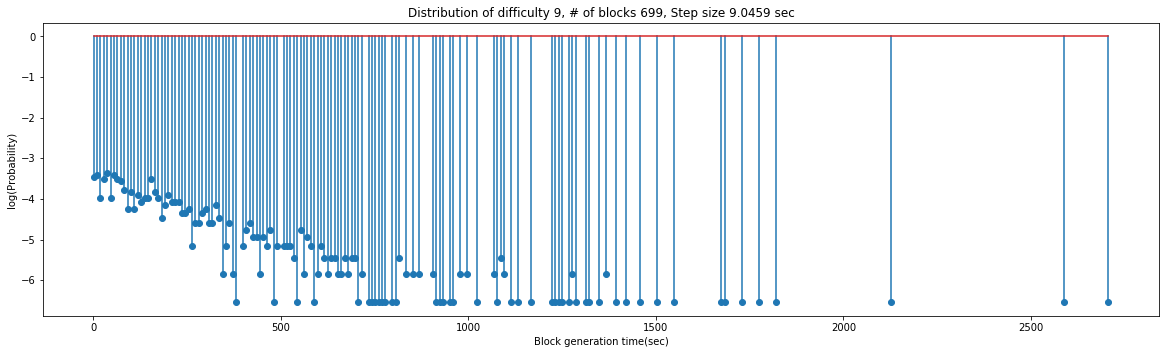

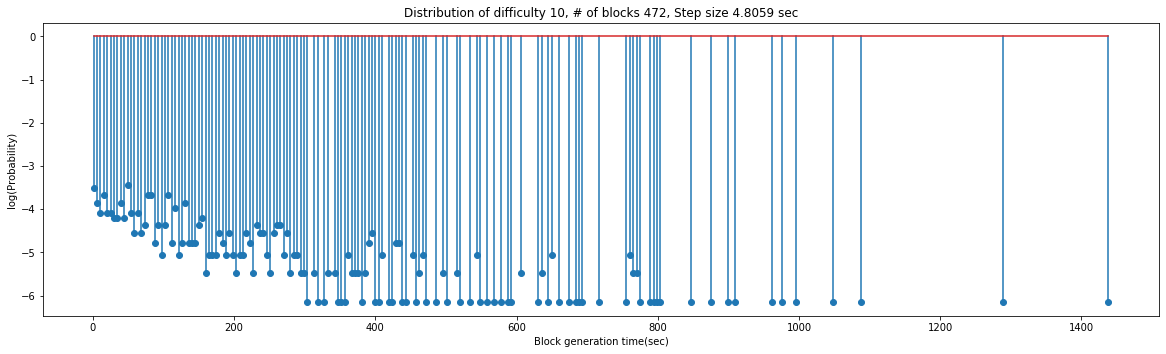

In [23]:
plt.rcParams["figure.figsize"] = (20,70)
num_of_bin = 300
for i in range(11):
    x = df_list[i]['block_height']
    frame = df_list[i]['elapsed_time'].astype(float)
    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)    

    ax.set_title(f"Distribution of difficulty {i}, # of blocks {len(np.array(frame))}, Step size {bin_list[i][1] - bin_list[i][0]:.4f} sec")
    #Each stick is {max(np.array(frame))/num_of_bin:.4f} sec
    ax.set_xlabel("Block generation time(sec)")
    ax.set_ylabel("log(Probability)")
    #plt.hist(frame, bins=num_of_bin, histtype='step')    
    plt.stem(bin_list[i][:-1], np.log(val_list[i]/sum(val_list[i])))
    #plt.legend(loc="upper left")

In [24]:
plt.rcParams["figure.figsize"] = (40,10)
plt.stem(bin_list[0][:-1], np.log(val_list[0]/sum(val_list[0])))
plt.plot(t[:int(n*0.3)], xr[:int(n*0.3)], 'r.-')
plt.plot(t[:int(n*0.3)], xr1[:int(n*0.3)], 'g.-')

NameError: name 't' is not defined

In [ ]:
a_s

In [90]:
def regress_with_conf_interval(time, x, confidental_interval):
    n = int(len(time) * confidental_interval)
    t = time[:n]
    xn = x[:n]
    assert len(t) == len(xn)
    # parameters    
    # add some noise
    #xn = x + randn(n)

    (ar, br) = polyfit(t, xn, 1)
    xr = polyval([ar, br], t)
    err = sqrt(sum((xr - xn)**2)/n)
    #slope, intercept, r_value, p_value, std_err
    (slope, intercept, r_value, p_value, std_err) = stats.linregress(t, xn)

    return slope, t, xr

In [91]:
slope, time, xr_result = regress_with_conf_interval(bin_list[0][:-1], np.log((val_list[0]+0.000001)/sum(val_list[0]+0.000001)), 50)

In [ ]:
plt.rcParams["figure.figsize"] = (40,10)
plt.plot(t, xr_result, 'g.-')

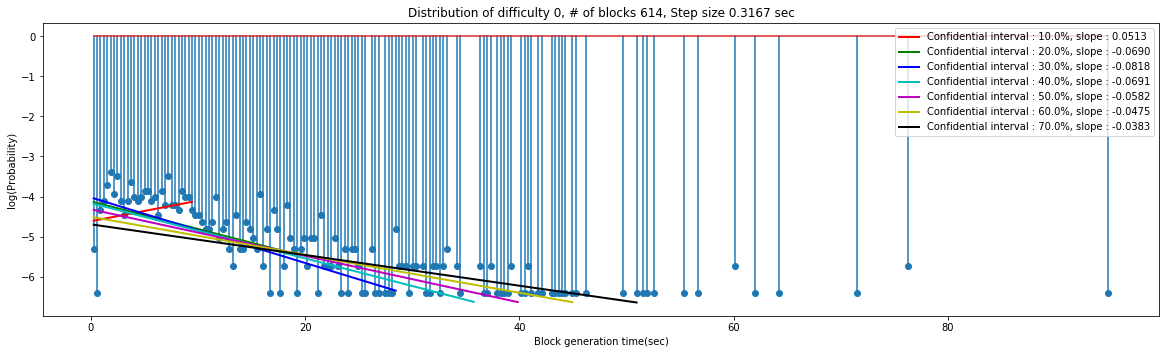

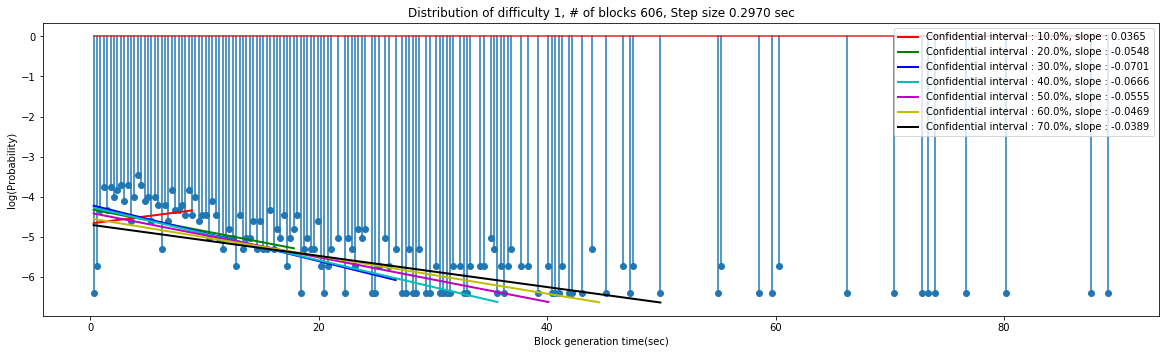

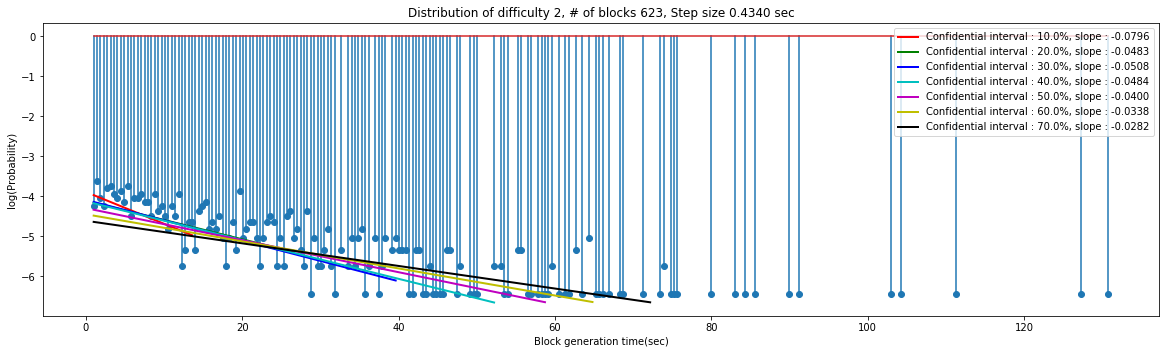

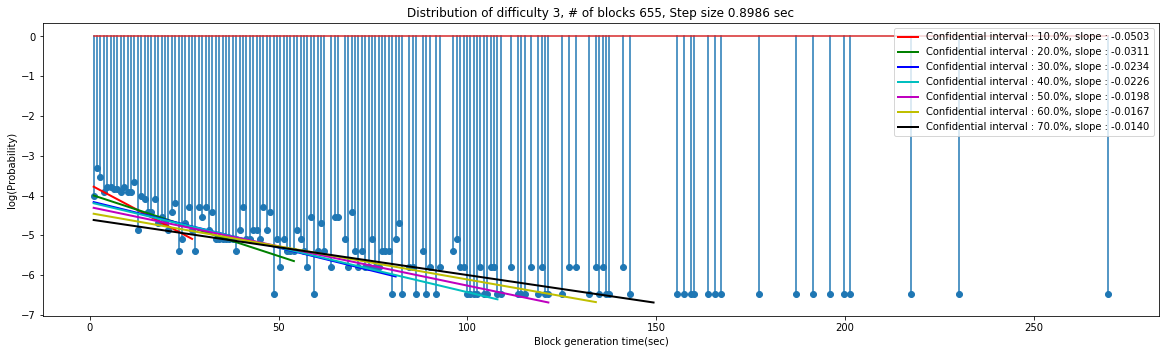

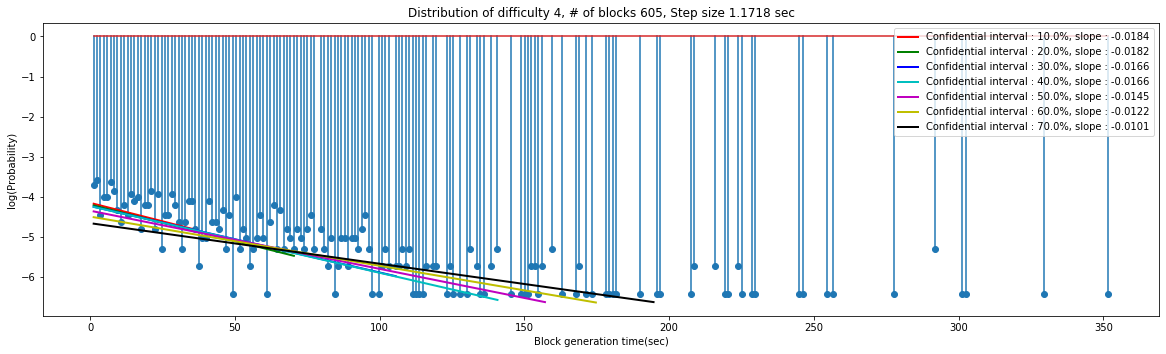

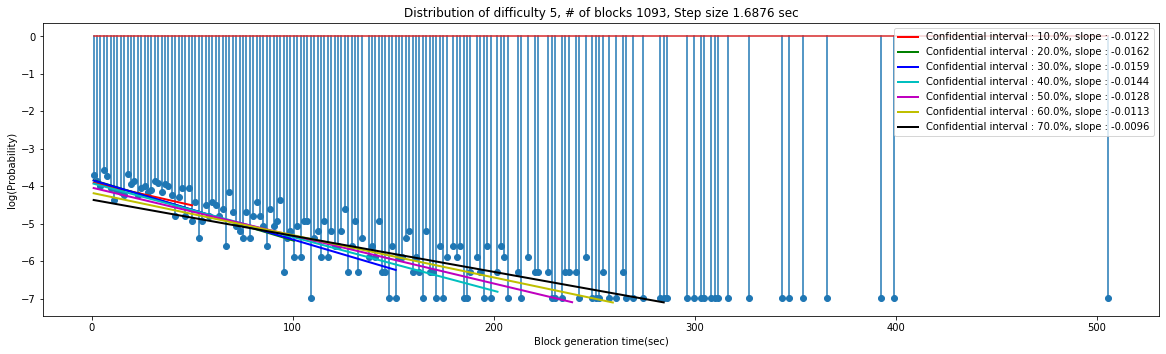

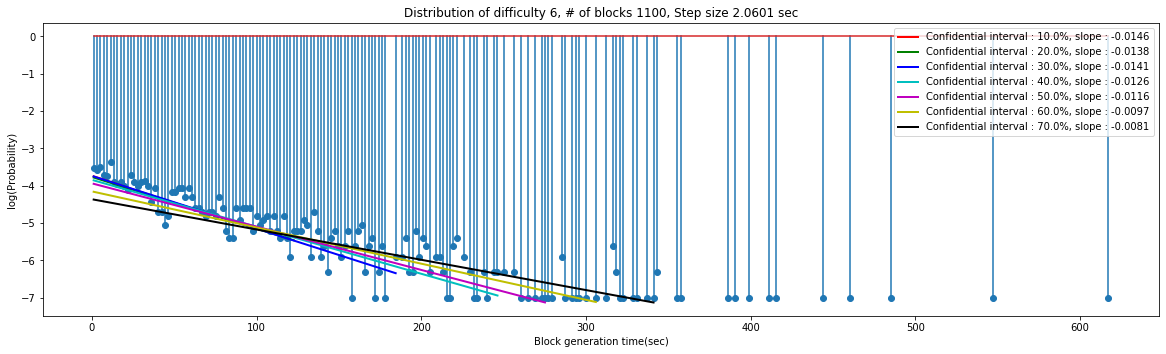

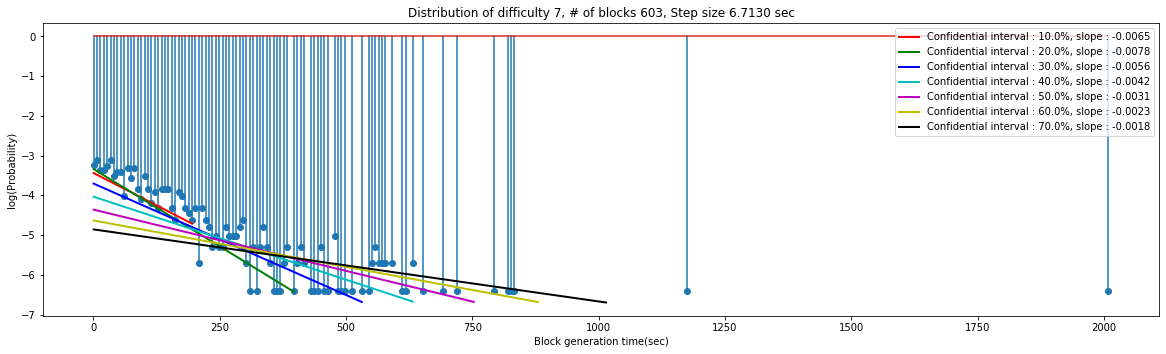

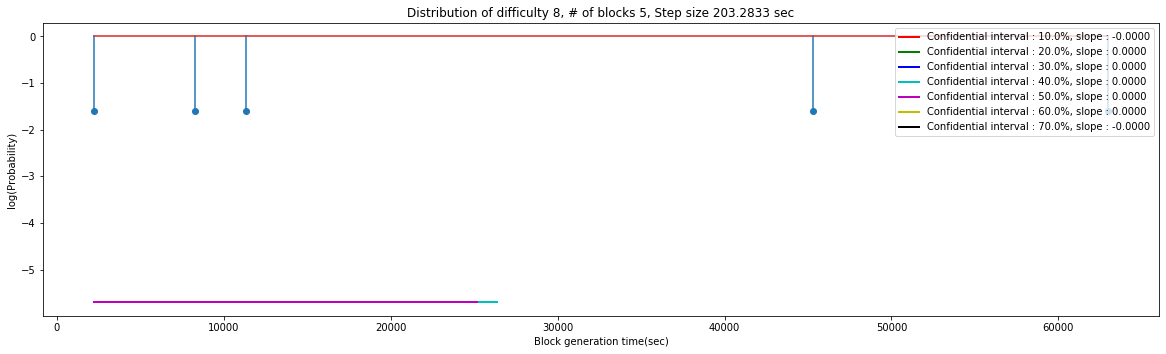

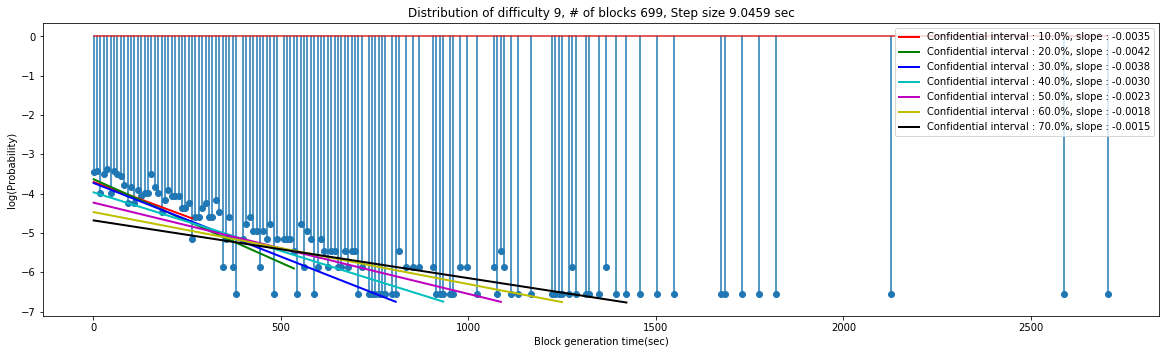

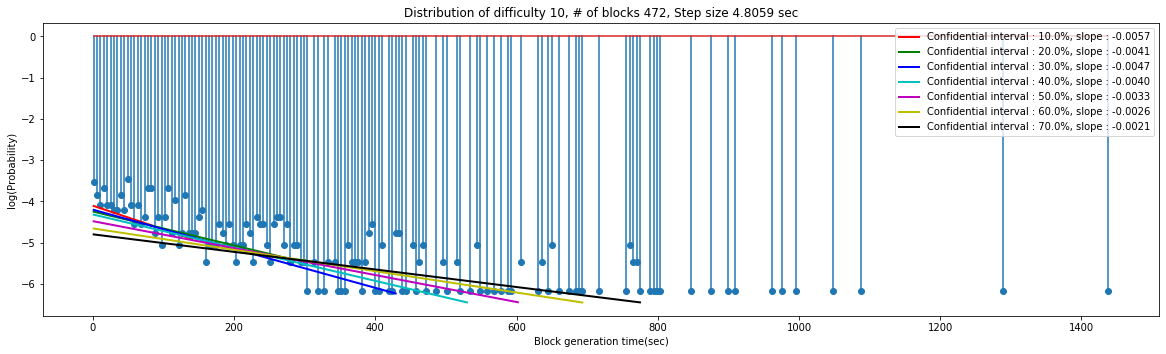

In [49]:
plt.rcParams["figure.figsize"] = (20,70)
num_of_bin = 300
confidential_interval = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
color = ['r-', 'g-', 'b-', 'c-', 'm-', 'y-', 'k-']
for i in range(11):
    x = df_list[i]['block_height']
    #frame = df_list[i]['elapsed_time'].astype(float)
    time = bin_list[i][:-1]
    val = val_list[i]
    log_val = np.log((val)/(sum(val)))
    interpolated_val = np.where(val==0, np.min(val[np.nonzero(val)]), val)    
    interpolated_log_val = np.log((interpolated_val)/(sum(interpolated_val)))
    # * Delete -inf which happened because of log(0)
    #val_for_regression = np.where(np.isinf(val), 0, val)
    #val_for_regression = np.where(val_for_regression==0, np.min(val_for_regression), val_for_regression)

    regression_slope_list = []
    regression_time_list = []
    regression_result_list = []

    fig = plt.figure()
    ax = fig.add_subplot(11,1,i+1)    
    ax.set_title(f"Distribution of difficulty {i}, # of blocks {(np.array(x))[-1]}, Step size {time[1] - time[0]:.4f} sec")
    #Each stick is {max(np.array(frame))/num_of_bin:.4f} sec
    ax.set_xlabel("Block generation time(sec)")
    ax.set_ylabel("log(Probability)")
    #plt.hist(frame, bins=num_of_bin, histtype='step')    
    plt.stem(time, log_val)    

    for i in range(len(confidential_interval)):
        slope, t, result = re.regress_with_conf_interval(time, interpolated_log_val, confidential_interval[i])
        regression_slope_list.append(slope)
        regression_time_list.append(t)
        regression_result_list.append(result)        

        # * For pretty plot
        min_log_val = np.min(interpolated_log_val)
        cutter_for_pretter = np.where(regression_result_list[i] < min_log_val)[0]
        if len(cutter_for_pretter) == 0:
            cutter_for_pretter = len(regression_result_list[i])
        else:
            cutter_for_pretter = cutter_for_pretter[0]  

        plt.plot(regression_time_list[i][:cutter_for_pretter], regression_result_list[i][:cutter_for_pretter],\
         color[i], label = f"Confidential interval : {confidential_interval[i]*100}%, slope : {slope :.4f}", linewidth=2)
    
    plt.legend(loc="upper right")

In [79]:
a = np.where(np.isinf(val), 0, val)